<a href="https://colab.research.google.com/github/AxlSyr/machinelearning/blob/main/Practica3_Scrap_EDAWoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/practices/Practica3_Scrap_EDAWoAns.ipynb)

<h1><center>Práctica 3 de Módulo 2</center><h1>

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [2]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [3]:
r = requests.get('https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.')
r

<Response [200]>

In [4]:
html = r.text

In [5]:
html

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.5a191e.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

In [6]:
r

<Response [200]>

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [7]:
parsed = BeautifulSoup(r.text, "html.parser")

In [8]:
main_box=parsed.find_all("div", {"class":"_13oc-S"})

In [9]:
len(main_box)

24

In [10]:
box=main_box[0]

In [11]:
box

<div class="_13oc-S"><div data-id="COMFSFNVDXG74QXR" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-pavilion-gaming-ryzen-5-quad-core-3550h-8-gb-1-tb-hdd-windows-10-home-4-gb-graphics-nvidia-geforce-gtx-1650-15-ec0101ax-laptop/p/itma1af6bf593dc8?pid=COMFSFNVDXG74QXR&amp;lid=LSTCOMFSFNVDXG74QXRY8FRH2&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_vAvR6%2F6e74BG9Ts8C9mFiaB0VLiuTZsBw%2BXssR0LlY%2BWVF4DmX4%2ByGRr36xx3jy6u%2BhHRQeTORjT%2BMGXHEfJ3w%3D%3D&amp;ssid=46erhwzshs0000001616693921650&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/NVIDIA GeFor..." class="_396cs4" src="//static-assets-web.flixcart.com/www/linchpin/

In [12]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [13]:
print(title,price,rating)

HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/NVIDIA GeFor... 49,990 4.2


In [20]:
data_list=[]
for box in main_box:
    temp_dict={
      'title': box.find('div', {'class':'_4rR01T'}).text.strip(),
      'rating': box.find('div', {'class':'_3LWZlK'}).text.strip() if box.find('div', {'class':'_3LWZlK'}) is not None else 'None',
      'price': box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()
    }
    
    data_list.append(temp_dict)

In [21]:
data_list

[{'price': '49,990',
  'rating': '4.2',
  'title': 'HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/NVIDIA GeFor...'},
 {'price': '1,09,990',
  'rating': '4.6',
  'title': 'acer Predator Helios 300 Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/N...'},
 {'price': '35,990',
  'rating': '4',
  'title': 'lenovo Ideapad S145 Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) S145-15IIL Laptop'},
 {'price': '47,990',
  'rating': '4.4',
  'title': 'HP 14s Ryzen 5 Quad Core 3500U 3rd Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 14s-dk0093AU Thin ...'},
 {'price': '54,990',
  'rating': '4.5',
  'title': 'acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...'},
 {'price': '35,990',
  'rating': '4.2',
  'title': 'HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s-cf3074TU Thin and Light Laptop'},
 {'price': '33,490',
  'rating': '4.2',
  'title': 'lenovo I

In [22]:
len(data_list)

24

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [23]:
df = pd.DataFrame(data_list)

In [24]:
df

,title,rating,price
0,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,4.2,"49,990"
1,acer Predator Helios 300 Core i7 10th Gen - (1...,4.6,"1,09,990"
2,lenovo Ideapad S145 Core i3 10th Gen - (8 GB/2...,4,"35,990"
3,HP 14s Ryzen 5 Quad Core 3500U 3rd Gen - (8 GB...,4.4,"47,990"
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,"54,990"
5,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"35,990"
6,lenovo Ideapad S145 Core i3 10th Gen - (4 GB/2...,4.2,"33,490"
7,lenovo Legion 5 Ryzen 5 Hexa Core 4600H - (8 G...,4.3,"65,990"
8,lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,4.1,"42,990"
9,ASUS VivoBook Ultra 14 Core i5 10th Gen - (8 G...,None,"49,990"


In [25]:
df.to_csv("datos_compus.csv", index=False, encoding='utf-8')

### Paso 5: Un poco de EDA y visualización de este archivo

In [ ]:
#completa

In [55]:
laptop_df = pd.read_csv("datos_compus.csv", sep=None, thousands=',', engine='python')

In [56]:
laptop_df

,title,rating,price
0,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,4.2,49990
1,acer Predator Helios 300 Core i7 10th Gen - (1...,4.6,109990
2,lenovo Ideapad S145 Core i3 10th Gen - (8 GB/2...,4,35990
3,HP 14s Ryzen 5 Quad Core 3500U 3rd Gen - (8 GB...,4.4,47990
4,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,54990
5,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,35990
6,lenovo Ideapad S145 Core i3 10th Gen - (4 GB/2...,4.2,33490
7,lenovo Legion 5 Ryzen 5 Hexa Core 4600H - (8 G...,4.3,65990
8,lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,4.1,42990
9,ASUS VivoBook Ultra 14 Core i5 10th Gen - (8 G...,None,49990


In [57]:
laptop_df.shape

(24, 3)

In [58]:
laptop_df.dtypes

title     object
rating    object
price      int64
dtype: object

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [62]:
laptop_df = pd.read_csv("datos_compus.csv", sep=None, thousands=',', engine='python')

In [63]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,spec
0,4.2,49990,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,(8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/...
1,4.6,109990,acer Predator Helios 300 Core i7 10th Gen,(16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 ...
2,4,35990,lenovo Ideapad S145 Core i3 10th Gen,(8 GB/256 GB SSD/Windows 10 Home) S145-15IIL ...
3,4.4,47990,HP 14s Ryzen 5 Quad Core 3500U 3rd Gen,(8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 14...
4,4.5,54990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [64]:
laptop_df['RAM'], laptop_df['Storage'] = laptop_df['spec'].str.split('(', 1).str
laptop_df['RAM'], laptop_df['Storage'] = laptop_df['Storage'].str.split('/', 1).str
laptop_df['Storage'], laptop_df['spec'] = laptop_df['Storage'].str.split('/', 1).str
laptop_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


,rating,price,model,spec,RAM,Storage
0,4.2,49990,HP Pavilion Gaming Ryzen 5 Quad Core 3550H,Windows 10 Home/4 GB Graphics/NVIDIA GeFor...,8 GB,1 TB HDD
1,4.6,109990,acer Predator Helios 300 Core i7 10th Gen,256 GB SSD/Windows 10 Home/6 GB Graphics/N...,16 GB,1 TB HDD
2,4,35990,lenovo Ideapad S145 Core i3 10th Gen,Windows 10 Home) S145-15IIL Laptop,8 GB,256 GB SSD
3,4.4,47990,HP 14s Ryzen 5 Quad Core 3500U 3rd Gen,256 GB SSD/Windows 10 Home) 14s-dk0093AU Thin ...,8 GB,1 TB HDD
4,4.5,54990,acer Aspire 7 Ryzen 5 Hexa Core 5500U,Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...,8 GB,512 GB SSD
5,4.2,35990,HP 14s Core i3 10th Gen,Windows 10 Home) 14s-cf3074TU Thin and Light L...,8 GB,256 GB SSD
6,4.2,33490,lenovo Ideapad S145 Core i3 10th Gen,Windows 10 Home) S145-15IIL Thin and Light Lap...,4 GB,256 GB SSD
7,4.3,65990,lenovo Legion 5 Ryzen 5 Hexa Core 4600H,Windows 10 Home/4 GB Graphics/NVIDIA GeForc...,8 GB,512 GB SSD
8,4.1,42990,lenovo Ideapad 3 Core i5 10th Gen,Windows 10 Home) 15IIL05 Laptop,8 GB,1 TB HDD
9,None,49990,ASUS VivoBook Ultra 14 Core i5 10th Gen,Windows 10 Home) X413JA-EK278TS Thin and Ligh...,8 GB,1 TB SSD


In [76]:
for i in laptop_df['spec']:
  print(i)

Windows 10 Home/4 GB Graphics/NVIDIA GeFor...
256 GB SSD/Windows 10 Home/6 GB Graphics/N...
Windows 10 Home) S145-15IIL Laptop
256 GB SSD/Windows 10 Home) 14s-dk0093AU Thin ...
Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...
Windows 10 Home) 14s-cf3074TU Thin and Light Laptop
Windows 10 Home) S145-15IIL Thin and Light Lap...
Windows 10 Home/4 GB Graphics/NVIDIA GeForc...
Windows 10 Home) 15IIL05 Laptop
Windows 10 Home) X413JA-EK278TS Thin and Ligh...
Windows 10 Home) S145-15AST Thin and Lig...
Windows 10 Home/2 GB Graphics) X509JB-EJ591T Laptop
Windows 10 Home) 5 14ITL05 2 in 1 Laptop
Windows 10 Home/8 GB Graphics/NVIDIA GeFor...
Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...
Windows 10 Home) 14-dv0058TU Thin and Light Laptop
256 GB SSD/Windows 10 Home/4 GB Graph...
Windows 10 Home) 15IGL05 Laptop
Mac OS Big Sur) MGN63HN/A
256 GB SSD/Windows 10 Home/6 GB Graphics/N...
256 GB SSD/Windows 10 Home) S340-14IIL Thin and ...
Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...
Windows 10 Hom

Continuemos hasta conseguir lo siguiente...

In [ ]:
#completa

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,Storage,OS
0,4.0,23990,Acer One 14 Pentium Gold,4 GB,1 TB HDD,Windows 10 Home) Z2-485 Thin and Light Laptop
1,4.4,121500,Apple MacBook Pro Core i5 8th Gen,8 GB,512 GB SSD,Mac OS Mojave) MV9A2HN
2,4.3,34790,Dell Inspiron 3505 Ryzen 3 Dual Core 3250U,8 GB,256 GB SSD,Windows 10 Home) Inspiron 3505 Laptop
3,4.3,47990,HP 14 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home) 14-ck2018TU Thin and Light La...
4,4.5,34990,Asus Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home) X515JA-EJ321T Thin and Light ...


In [ ]:
#completa

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,Storage,System,Other_Info
0,4.0,23990,Acer One 14 Pentium Gold,4 GB,1 TB HDD,Windows 10 Home,Z2-485 Thin and Light Laptop
1,4.4,121500,Apple MacBook Pro Core i5 8th Gen,8 GB,512 GB SSD,Mac OS Mojave,MV9A2HN
2,4.3,34790,Dell Inspiron 3505 Ryzen 3 Dual Core 3250U,8 GB,256 GB SSD,Windows 10 Home,Inspiron 3505 Laptop
3,4.3,47990,HP 14 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,14-ck2018TU Thin and Light Laptop
4,4.5,34990,Asus Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,X515JA-EJ321T Thin and Light Laptop


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
#completa

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
#completa

rating        0
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    2
dtype: int64

In [ ]:
#completa

23

In [ ]:
#completa

HP 15s Ryzen 3 Dual Core 3250U                      2
Asus VivoBook 15 Core i5 10th Gen                   1
Lenovo Ideapad 3 Athlon Dual Core 3050U             1
HP 15s Celeron Dual Core                            1
Mi Notebook 14 Core i5 10th Gen                     1
Lenovo Legion Y540 Core i5 9th Gen                  1
HP 14 Core i5 10th Gen                              1
HP 14s Core i3 10th Gen                             1
Lenovo Ideapad 3 Core i5 10th Gen                   1
Dell Inspiron 3501 Core i5 11th Gen                 1
Lenovo Ideapad S145 APU Dual Core A6 A6             1
Lenovo Ideapad 3 Core i3 10th Gen                   1
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600H     1
HP 15 Ryzen 3 Dual Core 3200U                       1
Asus Core i3 10th Gen                               1
Acer One 14 Pentium Gold                            1
Dell Inspiron 3505 Ryzen 3 Dual Core 3250U          1
LifeDigital Zed Core i3 5th Gen                     1
Dell Inspiron Core i5 10th G

In [ ]:
#completa

,rating,price
count,24.000000,24.000000
mean,4.204167,42157.458333
std,0.249311,21250.116282
min,3.700000,21990.000000
25%,4.000000,29990.000000
50%,4.250000,34990.000000
75%,4.325000,45746.750000
max,4.700000,121500.000000


In [ ]:
#completa

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
#completa

,rating,price,model,RAM,Storage,System,Other_Info
0,4.0,23990,Acer One 14 Pentium Gold,4 GB,1 TB HDD,Windows 10 Home,Z2-485 Thin and Light Laptop
5,4.0,42990,Asus VivoBook 15 Core i5 10th Gen,8 GB,1 TB HDD,Windows 10 Home,X515JA-EJ501T Thin and Light Lapto...
11,4.0,24990,Lenovo Ideapad S145 APU Dual Core A6 A6,4 GB,1 TB HDD,Windows 10 Home,S145-15AST Thin and Lig...
12,4.0,23990,HP 15s Celeron Dual Core,4 GB,1 TB HDD,Windows 10 Home,15s-du1044tu Thin and Light Laptop
16,4.0,25990,Lenovo Ideapad 3 Athlon Dual Core 3050U,4 GB,1 TB HDD,Windows 10 Home,15ADA05 Laptop
19,3.7,26990,LifeDigital Zed Core i3 5th Gen,4 GB,1 TB HDD,256 GB SSD/Windows 10 Home,Zed AIR CX3 Thin and Ligh...
20,3.8,33490,Lenovo Ideapad 3 Core i3 10th Gen,4 GB,1 TB HDD,Windows 10 Home,81weideapad 3 15iil05 Laptop
22,3.9,21990,Asus Celeron Dual Core,4 GB,1 TB HDD,Windows 10 Home,X543MA-GQ1015T Laptop


In [ ]:
#completa

,rating,price,model,RAM,Storage,System,Other_Info
4,4.5,34990,Asus Core i3 10th Gen,8 GB,1 TB HDD,Windows 10 Home,X515JA-EJ321T Thin and Light Laptop
6,4.5,34990,HP 15s Ryzen 3 Dual Core 3250U,8 GB,1 TB HDD,Windows 10 Home,15s-GR0011AU Thin and Light Laptop


---------

### Visualización de los datos

In [ ]:
#completa

Realizaremos una gráfica de barras de precio vs rating

Text(0.5, 1.0, 'Precio vs Calificación')

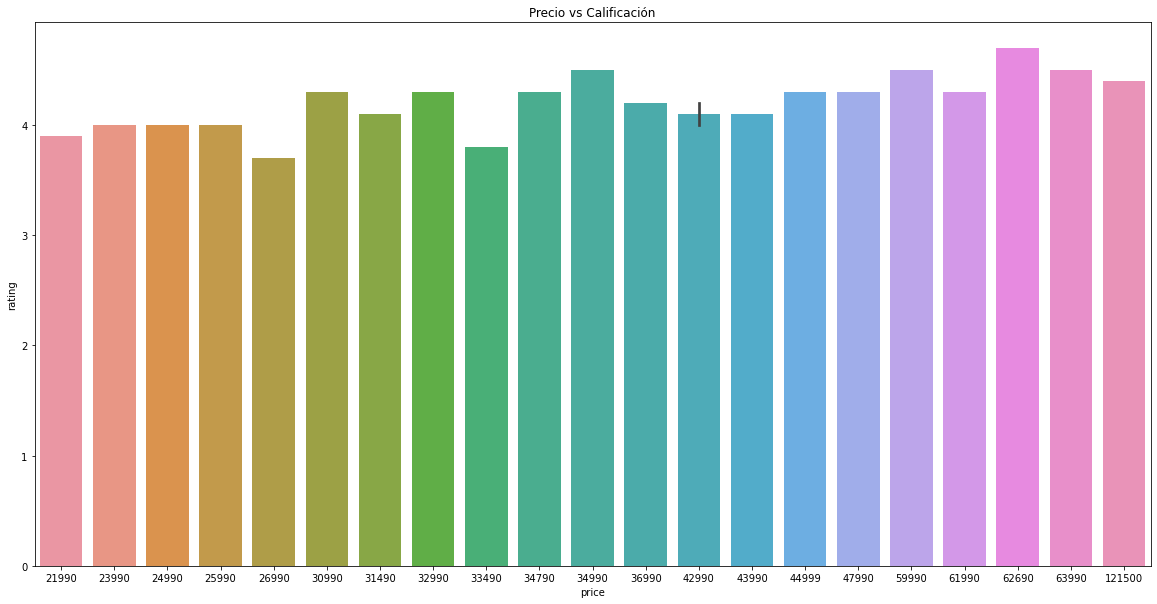

In [ ]:
#completa

Text(0.5, 1.0, 'Calificación vs Precio')

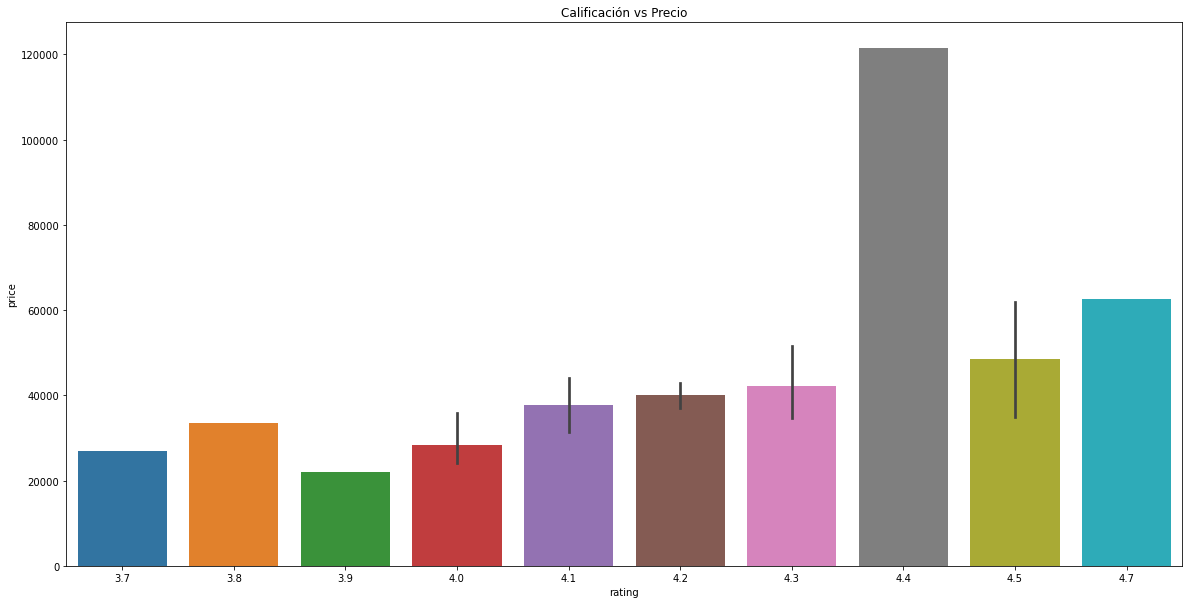

In [ ]:
#completa

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

Text(0.5, 1.0, 'Box plot')

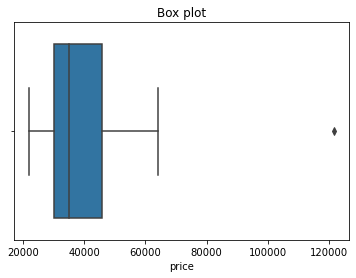

In [ ]:
#completa

## ¿Les ha salido algún discordante visual a ustedes?

In [ ]:
#completa

,rating,price,model,RAM,Storage,System,Other_Info
1,4.4,121500,Apple MacBook Pro Core i5 8th Gen,8 GB,512 GB SSD,Mac OS Mojave,MV9A2HN
15,4.7,62690,Dell Inspiron 3501 Core i5 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 10 Home/2 GB Graphics,Inspiro...
21,4.5,63990,Lenovo Legion Y540 Core i5 9th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 10 Home/4 GB Graphics/NVIDI...,NaN
23,4.3,61990,Dell Inspiron Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home,Ins 5408 Thin and Light Laptop


### ¿Para ustedes, cuáles fueron las computadoras más caras?

----
----
----

<h1><center>Monte Carlo</center><h1>

### ¿Por qué la casa siempre gana?

¿Cómo ganan dinero los casinos? El truco es sencillo: "Cuanto más juegas, más ganan". Echemos un vistazo a cómo funciona esto con un ejemplo simple de simulación de Monte Carlo.

----

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

Reglas:
 * Hay fichas que contienen números que van del 1 al 100 en una bolsa.
 * Los usuarios pueden apostar en fichas pares o impares.
 * En este juego, el 10 y el 11 son números especiales. Si apostamos a pares, entonces 10 se contará como un número impar, y si apostamos a las probabilidades, entonces 11 se contará como un número par.
 * Si apostamos a números pares y obtenemos 10, perdemos.
 * Si apostamos a números impares y obtenemos 11, perdemos.

Si apostamos por las probabilidades, la probabilidad de que ganemos es de 49/100. 

---

La probabilidad de que la casa gane es de 51/100. 

---

### Importamos librerías

In [ ]:
import random
import matplotlib.pyplot as plt

### Creación de las apuestas del jugador

In [ ]:
#Player bet
choice = input("Deseas apostar a pares o impares? \n")

#Pares
if choice == "Par":
    def pickNote():
        note = random.randint(1,100)
        if (note % 2 == 1) or (note == 10):
            return False
        else:
            return True

elif choice == "Odd":
    def pickNote():
        if (note % 2 == 0) or (note == 11):
            return False
        else:
            return True

Deseas apostar a pares o impares? 
Par


### Función principal

In [ ]:
def play(total_money, bet_money, total_plays):
    num_plays=[]
    money=[]

    play = 1
    
    for play in range(total_plays):
        if pickNote():
            total_money = total_money + bet_money
            num_plays.append(play)
            money.append(total_money)
            
        else:
            total_money = total_money - bet_money
            num_plays.append(play)
            money.append(total_money)
    
    plt.ylabel("Dinero en $")
    plt.xlabel("Numero de apuestas")
    plt.plot(num_plays, money)
    
    final_funds.append(money[-1])
    return(final_funds)

### Resultado final

[9800, 9200, 9800, 8800, 8400, 9800, 10000, 9800, 11000, 10200]
96800
El jugador empezó con $10,000
El jugador se fue con $ 9680.0


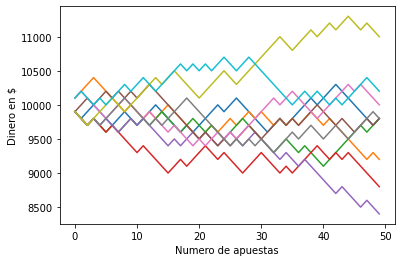

In [ ]:
final_funds = []
for i in range(10):
    ending_fund = play(10000, 100, 50)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

## Ahora, para un total de apuestas de 5, 10 y 1000....

### Ahora para mil iteraciones

[10300, 9900, 10100, 9900, 9900, 10100, 10300, 10300, 9900, 9900, 9900, 9900, 10100, 10100, 10100, 10300, 9900, 9900, 10100, 10100, 9700, 9900, 10100, 10300, 10300, 9700, 9700, 9900, 10100, 9900, 9900, 9700, 10100, 10300, 10100, 9900, 9500, 9900, 9500, 9700, 9900, 10100, 10100, 10100, 9700, 9500, 9700, 10100, 10300, 9900, 9700, 10100, 10300, 10100, 10100, 10300, 9900, 9900, 9900, 10100, 9900, 10100, 10100, 9700, 10500, 9900, 10100, 10300, 9500, 10100, 10300, 9500, 9900, 10100, 10300, 9700, 9700, 9700, 10100, 10300, 9900, 9900, 10300, 9500, 9700, 10300, 10100, 9700, 9900, 9900, 9700, 9700, 9500, 9900, 9900, 9700, 9700, 9900, 9700, 9900, 10500, 9900, 9900, 10500, 9700, 9900, 9700, 10100, 10300, 9700, 9900, 10300, 10100, 10300, 9700, 10100, 9900, 10100, 9900, 10100, 9500, 10100, 9900, 10100, 9900, 9700, 9900, 10100, 10100, 9700, 9700, 10300, 10300, 9700, 9900, 9700, 9700, 10100, 9900, 10100, 10300, 9700, 9900, 10100, 10100, 10100, 9500, 9700, 9900, 9700, 9900, 10300, 10100, 10100, 10300, 

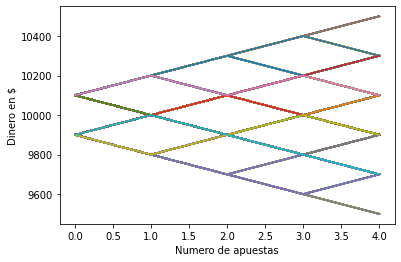

In [ ]:
final_funds = []
for i in range(1000):
    ending_fund = play(10000, 100, 5)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

[9600, 10200, 10200, 9800, 10000, 9600, 9800, 9600, 10000, 10200, 10000, 10200, 9800, 9800, 9600, 9800, 10200, 9600, 10200, 10000, 9800, 9200, 10000, 10600, 9600, 10200, 10400, 10000, 10000, 9800, 9800, 10000, 10200, 10000, 10200, 9800, 9800, 9800, 9600, 9400, 9800, 9800, 10200, 10000, 10000, 10000, 10000, 9800, 9600, 10400, 10000, 9600, 9400, 10200, 9600, 10000, 10000, 10200, 10200, 9600, 10200, 10200, 10200, 10000, 10400, 10600, 10000, 10400, 10000, 10400, 10200, 10200, 10000, 9800, 10600, 10000, 10200, 10000, 10200, 10000, 10200, 10200, 10600, 10000, 9200, 9800, 10200, 10000, 10000, 10200, 9800, 10400, 10600, 9600, 10200, 10600, 9600, 9800, 10200, 10200, 10400, 10000, 10400, 10000, 9600, 10400, 10400, 9400, 9800, 10000, 10000, 9600, 9800, 9600, 10200, 9600, 10400, 9600, 10000, 10000, 10400, 9600, 9400, 9800, 10400, 10000, 10400, 10000, 10000, 9800, 10400, 9800, 9600, 9800, 10000, 10000, 9600, 10200, 10200, 9400, 10200, 10000, 10000, 9600, 10400, 9800, 10200, 10400, 10000, 9400, 1040

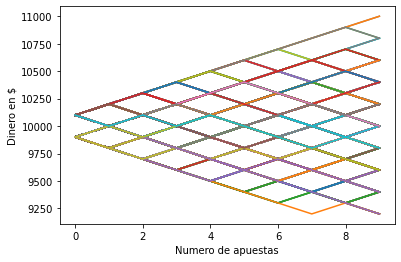

In [ ]:
final_funds = []
for i in range(1000):
    ending_fund = play(10000, 100, 10)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

[12600, 4800, 10000, 13400, 5600, 6600, 11400, 600, 8600, 11200, 6200, 10600, 9200, 7800, 12200, 7200, 9200, 15800, 5000, 9200, 7600, 10400, 7800, 5600, 8800, 9400, 10600, 15000, 4200, 9000, 6400, 15600, 5800, 9000, 5000, 8000, 11400, 10400, 7200, 5200, 11400, 4000, 600, 6000, 7000, 2200, -200, 6000, 6800, 7600, 4400, 3800, 10400, 12000, 14400, 8400, 5000, 7800, 3000, 7400, 2800, 10400, 3200, 10200, 5800, 7600, 6800, 200, 3400, 7800, 2200, 10000, 6600, 8000, 9400, 3000, 8000, 8200, 10800, 8000, 5400, 10600, 2200, 4600, 7000, 12400, 6400, 7800, 4400, 6600, 2600, 5200, 5000, 10200, 11800, 13000, 5600, 10200, 8000, 12400, 5200, 6800, 11600, 9400, 8000, 5600, 6000, 4800, 9000, 3800, 3200, 6200, 8800, 7800, 6200, 10000, 3800, 8200, 6200, 10400, 14800, 7400, 7400, 8600, 6000, 9600, 10400, 12600, 11600, 12000, 5000, 13200, 15400, 7400, 7600, 10400, 5400, 2400, 7600, 5200, 10800, 5800, 9000, 8000, 7400, 7200, 12000, 5200, 10400, 12600, 4000, 8400, 7200, 6000, 6800, 13600, -1000, 6000, 3400, 12

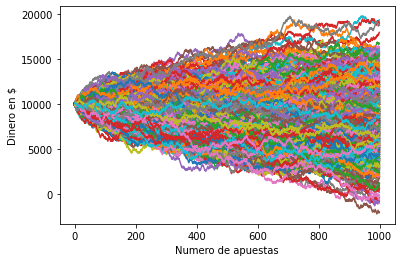

In [ ]:
final_funds = []
for i in range(1000):
    ending_fund = play(10000, 100, 1000)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

### ¿Qué conclusiones puedes inferir a partir del ejercicio anterior?

In [ ]:
#La casa siempre gana :( o casi siempre :( la mayoría del tiempo ':D

----

Tenga en cuenta que estos porcentajes son para nuestro juego figurativo y pueden modificarse....


-------

Al igual que con cualquier modelo de pronóstico, la simulación solo será tan buena como las estimaciones que hagamos. Es importante recordar que la simulación de Monte Carlo solo representa probabilidades y no certeza. Sin embargo, la simulación de Monte Carlo puede ser una herramienta valiosa a la hora de pronosticar un futuro desconocido.